In [1]:
from functions_for_all_nutrients import *
from iron_hemoglobin_functions import *

In [2]:
username = !whoami
username

['alibow']

In [3]:
index_cols=['location_id','sex_id','age_group_id']

age_group_ids = list(range(7,16))
sex_ids = [2]
coverage_levels = [0.2,0.5,0.8]
years = [2021,2022,2023,2024,2025]

In [4]:
coverage_data_dir = f'/ihme/homes/{username[0]}/notebooks/vivarium_research_lsff/data_prep/outputs/lsff_input_coverage_data.csv'

In [5]:
location_ids = (list(
                pd.read_csv(coverage_data_dir)
                .location_id
                .unique()))
location_ids

[179, 163, 214, 161, 165, 190, 189, 196, 201, 180, 15, 164, 20]

In [6]:
nutrient = 'iron'
vehicle = 'wheat flour'
effective_fractions = [1] * len(age_group_ids)

In [7]:
baseline_coverage, counterfactual_coverage = generate_overall_coverage_rates(
                                                     coverage_data_dir,
                                                     nutrient, 
                                                     vehicle,
                                                     coverage_levels,
                                                     years,
                                                     location_ids,
                                                    ['women of reproductive age','total population',np.nan])

# HEMOGLOBIN

In [8]:
from scipy.stats import norm

# mean and 0.975-quantile of normal distribution for mean difference (MD)
mean = 3
q_975 = 6.1

# 0.975-quantile of standard normal distribution (=1.96, approximately)
q_975_stdnorm = norm().ppf(0.975)

std = (q_975 - mean) / q_975_stdnorm # std dev of normal distribution

# Frozen normal distribution for MD, representing uncertainty in our effect size
hb_md_distribution = norm(mean, std)

In [9]:
mean_difference_hemoglobin_fort = generate_normal_rr_deficiency_nofort_draws(mean, std, location_ids)
mean_difference_hemoglobin_fort.head()

draws,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
179,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
163,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
214,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
161,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
165,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852


In [10]:
# NOTE:
# This approach currently does not consider that new coverage
# applies to those who are slightly more anemic
# than the overall population due to their lack
# of access to fortification

effective_baseline_coverage = get_effective_iron_hemoglobin_coverage(baseline_coverage, 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)
effective_counterfactual_coverage = get_effective_iron_hemoglobin_coverage(counterfactual_coverage, 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)

delta_effective_coverage = effective_counterfactual_coverage - effective_baseline_coverage
delta_effective_coverage

draw_0    draw_1  \
location_id sex_id age_group_id year coverage_level                       
15          2      7            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.001517  0.002002   
                                     0.5             0.003792  0.005006   
...                                                       ...       ...   
214         2      15           2024 0.5             0.215711  0.215542   
                                     0.8             0.345137  0.344867   
                                2025 0.2             0.086284  0.086217   
                                     0.5             0.215711  0.215542   
                                     0.8             0.345137  0.344867   

                                                       draw_2    draw_3  \
location_id sex_id age_group_id year coverage_level                       
15          2      7            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.001933  0.001973   
                                     0.5             0.004832  0.004931   
...                                                       ...       ...   
214         2      15           2024 0.5             0.215585  0.215608   
                                     0.8             0.344936  0.344973   
                                2025 0.2             0.086234  0.086243   
                                     0.5             0.215585  0.215608   
                                     0.8             0.344936  0.344973   

                                                       draw_4    draw_5  \
location_id sex_id age_group_id year coverage_level                       
15          2      7            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.001498  0.001957   
                                     0.5             0.003744  0.004893   
...                                                       ...       ...   
214         2      15           2024 0.5             0.215686  0.215538   
                                     0.8             0.345098  0.344861   
                                2025 0.2             0.086274  0.086215   
                                     0.5             0.215686  0.215538   
                                     0.8             0.345098  0.344861   

                                                       draw_6    draw_7  \
location_id sex_id age_group_id year coverage_level                       
15          2      7            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2             0.000907  0.001925   
                                     0.5             0.002269  0.004812   
...                                                       ...       ...   
214         2      15           2024 0.5             0.215655  0.215597   
                                     0.8             0.345048  0.344956   
                                2025 0.2             0.086262  0.086239   
                                     0.5             0.215655  0.215597   
                                     0.8             0.345048  0.344956   

                                                       draw_8    draw_9  ...  \
location_id sex_id age_group_id year coverage_level                    

In [11]:
mean_hgb = generate_hemoglobin_values(delta_effective_coverage, 
                                      mean_difference_hemoglobin_fort,
                                      location_ids, age_group_ids, sex_ids)
mean_hgb.to_csv('anemia_files_wra/mean_hgb_wra.csv')
mean_hgb = mean_hgb.reset_index().rename(columns={'year_id':'year'}).set_index(['location_id','sex_id','age_group_id','coverage_level','year'])
mean_hgb

/ihme/homes/alibow/notebooks/vivarium_research_lsff/multiplication_models/iron_hemoglobin_functions.py:112: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ignore_index=True)


draw_0      draw_1  \
location_id sex_id age_group_id coverage_level year                             
15          2      7            baseline       NaN     129.281724  121.814507   
                   8            baseline       NaN     120.628021  123.479326   
                   9            baseline       NaN     123.657715  120.042793   
                   10           baseline       NaN     124.312226  123.424090   
                   11           baseline       NaN     124.109368  124.739738   
...                                                           ...         ...   
214         2      15           0.5            2024.0  125.482581  128.166877   
                                0.8            2024.0  126.216926  128.459546   
                                0.2            2025.0  124.748236  127.874208   
                                0.5            2025.0  125.482581  128.166877   
                                0.8            2025.0  126.216926  128.459546   

                                                          draw_10    draw_100  \
location_id sex_id age_group_id coverage_level year                             
15          2      7            baseline       NaN     125.793186  122.629343   
                   8            baseline       NaN     121.948127  123.946895   
                   9            baseline       NaN     123.530546  117.071246   
                   10           baseline       NaN     123.608940  122.612175   
                   11           baseline       NaN     123.753938  123.710516   
...                                                           ...         ...   
214         2      15           0.5            2024.0  123.309381  119.289634   
                                0.8            2024.0  123.569541  119.500952   
                                0.2            2025.0  123.049222  119.078316   
                                0.5            2025.0  123.309381  119.289634   
                                0.8            2025.0  123.569541  119.500952   

                                                         draw_101    draw_102  \
location_id sex_id age_group_id coverage_level year                             
15          2      7            baseline       NaN     126.478887  123.364385   
                   8            baseline       NaN     119.897858  121.931236   
                   9            baseline       NaN     123.193417  121.473282   
                   10           baseline       NaN     121.256096  122.788884   
                   11           baseline       NaN     123.924298  122.527302   
...                                                           ...         ...   
214         2      15           0.5            2024.0  127.061740  122.889787   
                                0.8            2024.0  127.526228  123.357919   
                                0.2            2025.0  126.597252  122.421656   
                                0.5            2025.0  127.061740  122.889787   
                                0.8            2025.0  127.526228  123.357919   

                                                         draw_103    draw_104  \
location_id sex_id age_group_id coverage_level year                             
15          2      7            baseline       NaN     124.743918  122.868869   
                   8            baseline       NaN     122.363411  120.654826   
                   9            baseline       NaN     122.406353  120.944968   
                   10           baseline       NaN     121.788716  124.742336   
                   11           baseline       NaN     122.222948  123.098592   
...                                                           ...         ...   
214         2      15           0.5            2024.0  121.468593  124.390810   
                                0.8            2024.0  121.561415  124.878227   
                                0.2            2025.0  121.375771  123.903394   
      

In [12]:
hgb_sd = get_draws('modelable_entity_id',
                10488,
                source='epi',
                location_id=location_ids,
                age_group_id=age_group_ids,
                sex_id=sex_ids,
                year_id=2019,
                gbd_round_id=6,
                decomp_step='step4',
                status='best')
hgb_sd = (hgb_sd.set_index(['location_id','sex_id','age_group_id'])
 .filter([c for c in hgb_sd if 'draw' in c])
 .reset_index())
hgb_sd.to_csv('anemia_files_wra/sd_hgb_wra.csv')
hgb_sd.head()

,location_id,sex_id,age_group_id,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
0,15,2,7,15.591551,10.693851,8.874689,11.332445,14.051764,12.808693,10.346090,...,10.851915,9.934312,10.968488,9.210982,12.684698,11.150992,13.577070,12.049253,11.465338,10.013502
1,15,2,8,15.526146,13.194009,14.147815,13.954449,13.698650,13.616005,14.063429,...,12.582726,13.866200,15.266511,12.618371,13.062855,12.951547,11.751521,12.189209,11.858807,13.576832
2,15,2,9,14.610555,14.071980,15.818822,11.760676,12.876897,13.922249,14.578266,...,14.370774,14.792137,12.546434,13.808710,15.694093,14.504026,14.620374,15.083215,13.535158,13.564113
3,15,2,10,15.073015,12.581562,14.474551,17.545870,12.806287,12.965416,14.978553,...,12.611023,15.340052,14.039264,17.605055,12.926722,14.932496,16.820285,15.147577,15.754898,15.716531
4,15,2,11,16.126373,15.627473,15.788409,17.314628,12.626110,17.586191,15.560483,...,16.011737,13.706079,14.078164,16.225163,16.143625,13.080316,13.365284,14.354564,14.630935,14.876951


In [13]:
# get age-specific fertility rate
get_covariate_estimates(13, 
                               location_id=location_ids,
                               age_group_id=age_group_ids,
                               sex_id=sex_ids,
                               year_id=2019,
                               gbd_round_id=6,
                               decomp_step='step4').to_csv('anemia_files_wra/asfr.csv')


# get still birth to live birth ratio (not age-specific)
still = get_covariate_estimates(2267, 
                                location_id=location_ids,
                                year_id=2019,
                                gbd_round_id=6,
                                decomp_step='step4').to_csv('anemia_files_wra/still.csv')

In [14]:
# NOW RUN HEMOGLOBIN_TO_ANEMIA.R FILE BEFORE RUNNING NEXT CELL
assert "Did you run the R file?" == "Double check :)", "Make sure you run the R file!"

AssertionError: Make sure you run the R file!

In [15]:
anemia = load_anemia_prev_and_calculate_ylds('anemia_files_wra/anemia_prev_wra.csv')
baseline_anemia = (duplicate_over_simulation_years(anemia.loc[anemia.coverage_level=='baseline'], years)
                   .drop(columns='coverage_level')
                   .set_index(['location_id','age_group_id','sex_id','year','draw']))
counterfactual_anemia = (anemia.loc[anemia.coverage_level != 'baseline']
                         .set_index(['location_id','age_group_id','sex_id','year','draw','coverage_level']))
averted_anemia = baseline_anemia - counterfactual_anemia
averted_anemia

mild  \
location_id age_group_id sex_id year draw     coverage_level             
15          7            2      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         15           2      2025 draw_998 0.5             0.005604   
                                              0.8             0.008956   
                                     draw_999 0.2             0.001150   
                                              0.5             0.002888   
                                              0.8             0.004642   

                                                              moderate  \
location_id age_group_id sex_id year draw     coverage_level             
15          7            2      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         15           2      2025 draw_998 0.5             0.005206   
                                              0.8             0.008229   
                                     draw_999 0.2             0.002479   
                                              0.5             0.006163   
                                              0.8             0.009805   

                                                                severe  \
location_id age_group_id sex_id year draw     coverage_level             
15          7            2      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         15           2      2025 draw_998 0.5             0.000154   
                                              0.8             0.000244   
                                     draw_999 0.2             0.000211   
                                              0.5             0.000522   
                                              0.8             0.000825   

                                                                anemic  \
location_id age_group_id sex_id year draw     coverage_level             
15          7            2      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         15           2      2025 draw_998 0.5             0.010964   
                                              0.8             0.017429   
                                     draw_999 0.2             0.003840   
                                              0.5             0.009573   
                                              0.8             0.015272   

                                                              mild_ylds  \
location_id age_group_id sex_id year draw     coverage_level              
15          7            2      2021 draw_0   0.2              0

In [16]:
counts, rates = population_weight_values(averted_anemia.reset_index(), age_group_ids, sex_ids, location_ids)

In [17]:
counts = summarize_data(counts)
rates = summarize_data(rates)

In [18]:
anemia_counts_averted = (counts.loc[counts.severity=='anemic']
     .loc[counts.measure=='ylds']
     .set_index(['location_id','coverage_level','year'])
     .drop(columns=['severity','measure']))
anemia_counts_averted.head()

draw                                 draw_0      draw_1     draw_10  \
location_id coverage_level year                                       
15          0.2            2021    0.000000    0.000000    0.000000   
            0.5            2021    0.000000    0.000000    0.000000   
            0.8            2021    0.000000    0.000000    0.000000   
            0.2            2022  152.222233   83.269489   68.140304   
            0.5            2022  380.409820  208.124297  170.315133   

draw                               draw_100    draw_101    draw_102  \
location_id coverage_level year                                       
15          0.2            2021    0.000000    0.000000    0.000000   
            0.5            2021    0.000000    0.000000    0.000000   
            0.8            2021    0.000000    0.000000    0.000000   
            0.2            2022   54.409889  133.321086  138.797071   
            0.5            2022  136.005933  333.182386  346.871788   

draw                              draw_103    draw_104    draw_105  \
location_id coverage_level year                                      
15          0.2            2021   0.000000    0.000000    0.000000   
            0.5            2021   0.000000    0.000000    0.000000   
            0.8            2021   0.000000    0.000000    0.000000   
            0.2            2022  16.814360  128.456489   76.686539   
            0.5            2022  42.033832  321.034477  191.676216   

draw                               draw_106  ...    draw_990    draw_991  \
location_id coverage_level year              ...                           
15          0.2            2021    0.000000  ...    0.000000    0.000000   
            0.5            2021    0.000000  ...    0.000000    0.000000   
            0.8            2021    0.000000  ...    0.000000    0.000000   
            0.2            2022  168.547976  ...   76.087166   42.118049   
            0.5            2022  421.154966  ...  190.178018  105.283178   

draw                               draw_992    draw_993    draw_994  \
location_id coverage_level year                                       
15          0.2            2021    0.000000    0.000000    0.000000   
            0.5            2021    0.000000    0.000000    0.000000   
            0.8            2021    0.000000    0.000000    0.000000   
            0.2            2022   53.139222  195.021545   54.932747   
            0.5            2022  132.829617  487.264714  137.310828   

draw                               draw_995    draw_996    draw_997  \
location_id coverage_level year                                       
15          0.2            2021    0.000000    0.000000    0.000000   
            0.5            2021    0.000000    0.000000    0.000000   
            0.8            2021    0.000000    0.000000    0.000000   
            0.2            2022  106.372917  121.625094   76.288568   
            0.5            2022  265.857890  303.963916  190.677523   

draw                               draw_998    draw_999  
location_id coverage_level year                          
15          0.2            2021    0.000000    0.000000  
            0.5            2021    0.000000    0.000000  
            0.8            2021    0.000000    0.000000  
            0.2            2022   70.310610   79.186096  
            0.5            2022  175.742143  197.928635  

[5 rows x 1000 columns]

In [19]:
anemia_rates_averted = (rates.loc[rates.severity=='anemic']
     .loc[rates.measure=='ylds']
     .set_index(['location_id','coverage_level','year'])
     .drop(columns=['severity','measure']))
anemia_rates_averted.head()

draw                               draw_0    draw_1   draw_10  draw_100  \
location_id coverage_level year                                           
15          0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022  0.800987  0.438161  0.358552  0.286303   
            0.5            2022  2.001701  1.095142  0.896191  0.715658   

draw                             draw_101  draw_102  draw_103  draw_104  \
location_id coverage_level year                                           
15          0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022  0.701530  0.730345  0.088476  0.675933   
            0.5            2022  1.753192  1.825226  0.221180  1.689271   

draw                             draw_105  draw_106  ...  draw_990  draw_991  \
location_id coverage_level year                      ...                       
15          0.2            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.2            2022  0.403522  0.886893  ...  0.400368  0.221624   
            0.5            2022  1.008593  2.216101  ...  1.000709  0.553996   

draw                             draw_992  draw_993  draw_994  draw_995  \
location_id coverage_level year                                           
15          0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022  0.279616  1.026196  0.289054  0.559730   
            0.5            2022  0.698944  2.563968  0.722524  1.398934   

draw                             draw_996  draw_997  draw_998  draw_999  
location_id coverage_level year                                          
15          0.2            2021  0.000000  0.000000  0.000000  0.000000  
            0.5            2021  0.000000  0.000000  0.000000  0.000000  
            0.8            2021  0.000000  0.000000  0.000000  0.000000  
            0.2            2022  0.639986  0.401427  0.369972  0.416674  
            0.5            2022  1.599446  1.003338  0.924748  1.041493  

[5 rows x 1000 columns]

In [20]:
# total iron responsive anemia burden
iron_responsive_anemia_sequelae = [1004, 1005, 1006, 1008, 1009, 1010, 1012, 1013, 
                                   1014, 1016, 1017, 1018, 1020, 1021, 1022, 1024, 1025, 1026, 
                                   1028, 1029, 1030, 1032, 1033, 1034, 1361, 1364, 1367, 1373, 1376, 
                                   1379, 1385, 1388, 1391, 1397, 1400, 1403, 1409, 1412, 1415, 1421, 
                                   1424, 1427, 1433, 1436, 1439, 1445, 1448, 1451, 5213, 5216, 5219, 
                                   5222, 5225, 5228, 5237, 5240, 5243, 5246, 5249, 5252, 5261, 5264, 
                                   5267, 5270, 5273, 5276, 4985, 4988, 4991, 4994, 4997, 5000, 5009, 
                                   5012, 5015, 5678, 5681, 5684, 7214, 7217, 7220, 4952, 4955, 4958, 
                                   4961, 4964, 4967, 4976, 4979, 4982, 5627, 5630, 5633, 7202, 7205, 
                                   7208, 5393, 5396, 5399, 182, 183, 184, 240, 241, 242, 177, 178, 
                                   179, 144,145,146,172,173,174,525,526,527,1106,1107,1108,537,538,
                                   539,206,207,208, 22989, 22990, 22991, 22992, 22993, 22999, 23000, 
                                   23001, 23002, 23003, 23009, 23010, 23011, 23012, 23013,
                                   5567, 5570, 5573, 5579, 5582, 5585,
                                   23030, 23031, 23032, 23034, 23035, 23036, 23038, 23039, 23040,
                                   23042, 23043, 23044, 23046, 23047, 23048]

ira_ylds = get_draws('sequela_id', iron_responsive_anemia_sequelae, 
                 source='como',
                 location_id=location_ids, 
                 age_group_id=age_group_ids,
                 sex_id=sex_ids,
                 year_id=2019,
                 measure_id=3,
                 decomp_step='step5',
                 gbd_round_id=6)
ira_ylds = ira_ylds.groupby(['location_id','sex_id','age_group_id'], as_index=False).sum()

pop = get_population(location_id=location_ids,
                    age_group_id=age_group_ids,
                    sex_id=sex_ids,
                    gbd_round_id=6,
                    year_id=2019,
                    decomp_step='step4')

ira_ylds = ira_ylds.merge(pop, on=['location_id','sex_id','age_group_id'])
for i in list(range(0,1000)):
    ira_ylds[f'draw_{i}'] = ira_ylds[f'draw_{i}'] * ira_ylds['population']
ira_ylds = ira_ylds.groupby(['location_id']).sum()
for i in list(range(0,1000)):
    ira_ylds[f'draw_{i}'] = ira_ylds[f'draw_{i}'] / ira_ylds['population'] * 100_000
ira_ylds = ira_ylds.drop(columns=[c for c in ira_ylds.columns if 'draw' not in c])
ira_ylds.head()

,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
15,1165.677602,1024.724016,798.548094,1125.979673,850.254048,1036.408959,1026.833363,851.020927,1114.407576,700.764019,...,860.833218,1035.594794,1032.030641,856.656757,916.625132,1076.488273,511.788271,728.085922,769.820640,904.507905
20,367.290472,368.594553,306.299292,333.001772,305.650688,294.254884,303.917782,253.653451,374.208848,251.087895,...,289.525941,376.053908,257.793100,244.783757,318.369979,370.470222,140.774655,284.897535,239.583945,223.643206
161,815.373354,757.259280,633.009214,756.366688,616.591860,660.079125,788.492728,645.117877,738.218553,511.467067,...,650.579609,729.907661,712.948787,506.126551,708.556881,629.241746,336.382230,542.628894,620.173775,494.706553
163,1648.044374,1527.160131,1265.674924,1554.341027,1286.920146,1459.132145,1617.330958,1238.704420,1639.631445,1022.995656,...,1246.385955,1520.507539,1505.262585,1368.586206,1400.305859,1496.696733,728.304694,1181.105742,1171.923801,1147.538967
164,1010.819992,1053.102408,855.153814,1120.652995,851.335430,987.126362,1174.371476,747.855440,1194.551053,666.860768,...,842.360786,1067.862760,951.427166,918.348158,934.274729,998.427727,477.647659,787.520640,894.142525,660.410754


In [21]:
# check iron responsive portion
impairment_anemia = get_draws(gbd_id_type='rei_id',
         gbd_id=[192],
         source='como',
         location_id=location_ids,
         sex_id=sex_ids,
         age_group_id=age_group_ids,
         gbd_round_id=6,
         year_id=2019,
         decomp_step='step5',
         measure_id=[3])
impairment_anemia = impairment_anemia.loc[impairment_anemia.cause_id==294]
impairment_anemia = impairment_anemia.merge(pop, on=['location_id','sex_id'])
for i in list(range(0,1000)):
    impairment_anemia[f'draw_{i}'] = impairment_anemia[f'draw_{i}'] * impairment_anemia['population']
impairment_anemia = impairment_anemia.groupby(['location_id','measure_id','rei_id']).sum()
for i in list(range(0,1000)):
    impairment_anemia[f'draw_{i}'] = impairment_anemia[f'draw_{i}'] / impairment_anemia['population'] * 100_000
impairment_anemia = impairment_anemia.drop(columns=[c for c in impairment_anemia.columns if 'draw' not in c])
(ira_ylds / impairment_anemia).mean(axis=1)

location_id  measure_id  rei_id
15           3           192       0.916792
20           3           192       1.078846
161          3           192       0.796116
163          3           192       0.799578
164          3           192       0.940607
165          3           192       0.857264
179          3           192       0.828381
180          3           192       0.608740
189          3           192       0.677578
190          3           192       0.485159
196          3           192       0.705113
201          3           192       0.572733
214          3           192       0.681668
dtype: float64

In [22]:
anemia_pifs = anemia_rates_averted / (ira_ylds) * 100
anemia_pifs.head()

draw                               draw_0    draw_1   draw_10  draw_100  \
location_id coverage_level year                                           
15          0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022  0.068714  0.042759  0.044900  0.025427   
            0.5            2022  0.171720  0.106872  0.112228  0.063559   

draw                             draw_101  draw_102  draw_103  draw_104  \
location_id coverage_level year                                           
15          0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022  0.082508  0.070469  0.008616  0.079426   
            0.5            2022  0.206196  0.176111  0.021540  0.198499   

draw                             draw_105  draw_106  ...  draw_990  draw_991  \
location_id coverage_level year                      ...                       
15          0.2            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  ...  0.000000  0.000000   
            0.2            2022  0.036210  0.126561  ...  0.046509  0.021401   
            0.5            2022  0.090505  0.316241  ...  0.116249  0.053495   

draw                             draw_992  draw_993  draw_994  draw_995  \
location_id coverage_level year                                           
15          0.2            2021  0.000000  0.000000  0.000000  0.000000   
            0.5            2021  0.000000  0.000000  0.000000  0.000000   
            0.8            2021  0.000000  0.000000  0.000000  0.000000   
            0.2            2022  0.027094  0.119791  0.031535  0.051996   
            0.5            2022  0.067725  0.299299  0.078824  0.129953   

draw                             draw_996  draw_997  draw_998  draw_999  
location_id coverage_level year                                          
15          0.2            2021  0.000000  0.000000  0.000000  0.000000  
            0.5            2021  0.000000  0.000000  0.000000  0.000000  
            0.8            2021  0.000000  0.000000  0.000000  0.000000  
            0.2            2022  0.125049  0.055135  0.048059  0.046066  
            0.5            2022  0.312521  0.137805  0.120125  0.115145  

[5 rows x 1000 columns]

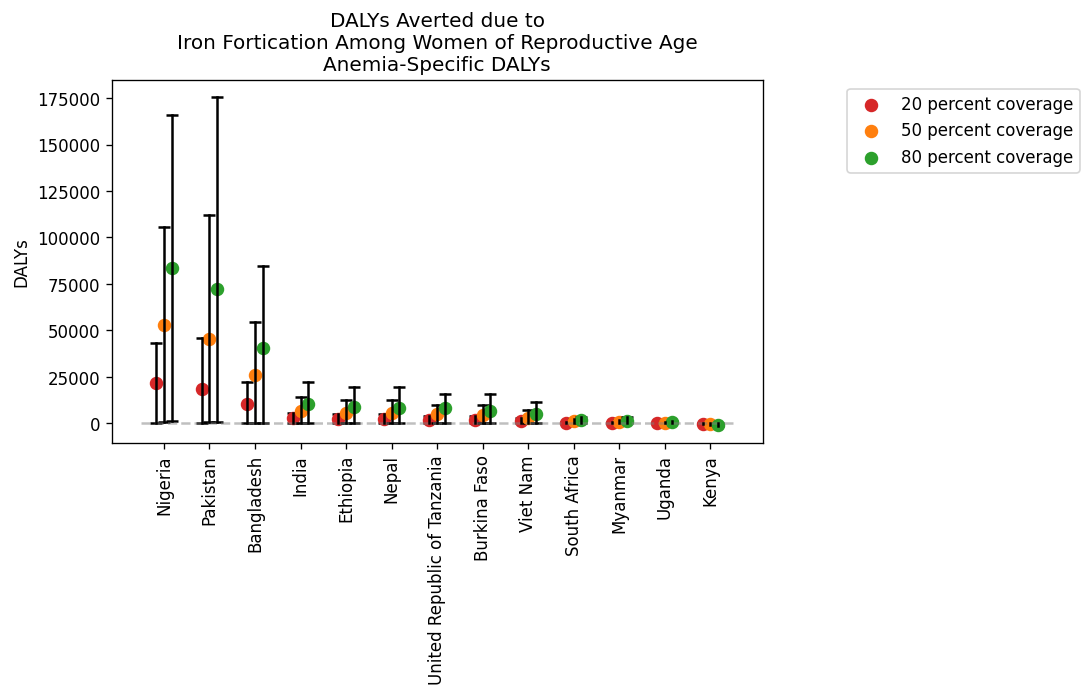

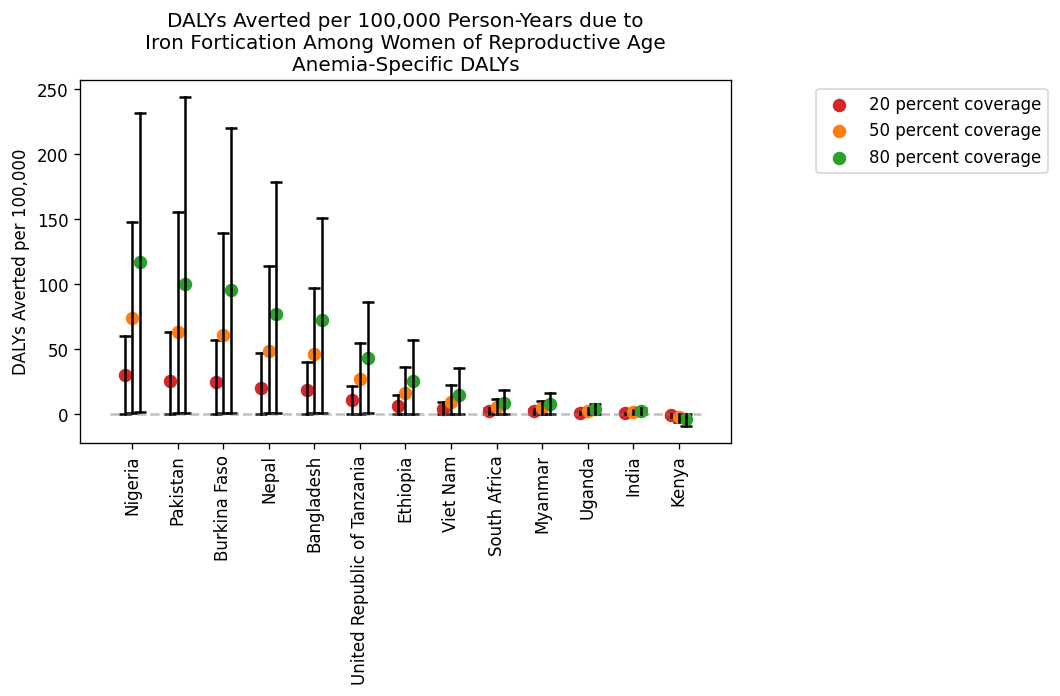

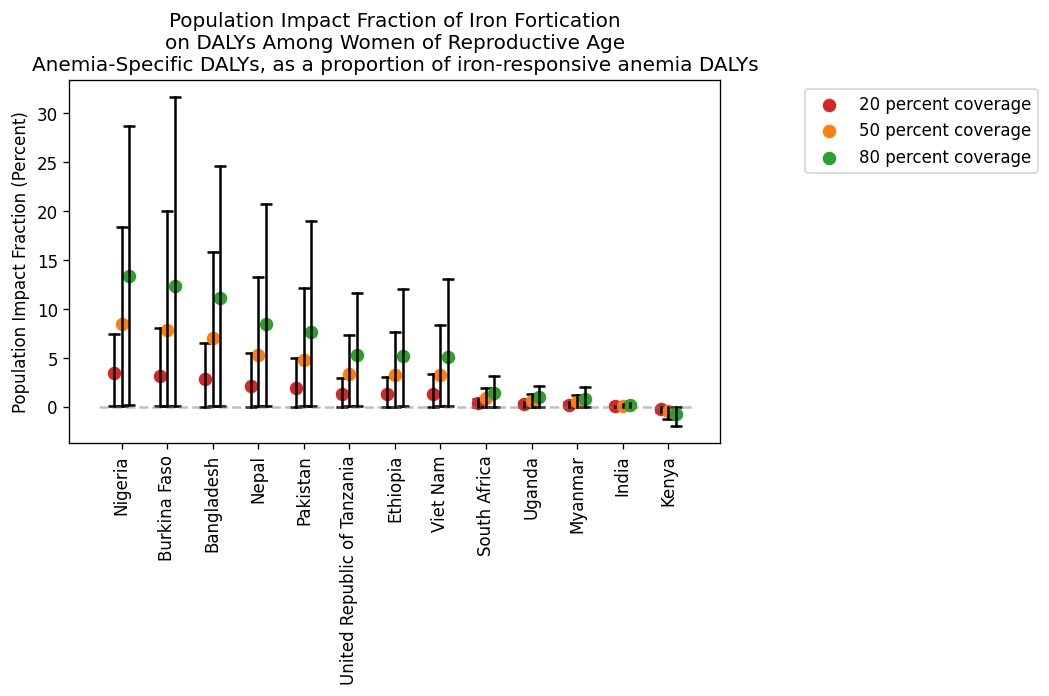

In [23]:
make_dot_plots(
    anemia_counts_averted, 
    'Iron', 
    'counts', 
    coverage_levels, 'Anemia-Specific DALYs', 
    'iron_wra_anemia_counts_averted', True)

make_dot_plots(
    anemia_rates_averted, 
    'Iron', 
    'rates', 
    coverage_levels, 'Anemia-Specific DALYs', 
    'iron_wra_anemia_rates_averted', True)

make_dot_plots(
    anemia_pifs, 
    'Iron', 
    'pifs', 
    coverage_levels, 'Anemia-Specific DALYs, as a proportion of iron-responsive anemia DALYs', 
    'iron_wra_anemia_pif', True)

# MATERNAL DISORDERS

In [24]:
rr = get_draws('rei_id',
                 95,
                 source='rr',
                 location_id=location_ids,
                 age_group_id=age_group_ids,
                 sex_id=sex_ids,
                 year_id=2019,
                 gbd_round_id=6,
                 decomp_step='step4'
                 )
rr = rr.loc[rr.cause_id==367].set_index(['sex_id','age_group_id'])
rr = rr.drop(columns=[c for c in rr.columns if 'draw' not in c])
rr

/ihme/code/central_comp/miniconda_svc-ccomp/envs/v107/lib/python3.7/site-packages/get_draws/sources/rr.py:256: UserWarning: RRs draws returned for rei_id = 95 have location_id(s) = 1 where 179, 163, 214, 161, 165, 190, 189, 196, 201, 180, 15, 164, 20 were requested.
  ", ".join(str(hf) for hf in hdf_filters['location_id'])


draw_0    draw_1    draw_2    draw_3    draw_4  \
sex_id age_group_id                                                     
2      8             1.212408  1.350076  1.086644  1.219068  1.261495   
       13            1.212408  1.350076  1.086644  1.219068  1.261495   
       11            1.212408  1.350076  1.086644  1.219068  1.261495   
       10            1.212408  1.350076  1.086644  1.219068  1.261495   
       9             1.212408  1.350076  1.086644  1.219068  1.261495   
       12            1.212408  1.350076  1.086644  1.219068  1.261495   
       14            1.212408  1.350076  1.086644  1.219068  1.261495   
       7             1.212408  1.350076  1.086644  1.219068  1.261495   
       15            1.212408  1.350076  1.086644  1.219068  1.261495   

                       draw_5    draw_6    draw_7   draw_8    draw_9  ...  \
sex_id age_group_id                                                   ...   
2      8             1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       13            1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       11            1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       10            1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       9             1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       12            1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       14            1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       7             1.286287  1.092801  1.212885  1.19206  1.194871  ...   
       15            1.286287  1.092801  1.212885  1.19206  1.194871  ...   

                     draw_990  draw_991  draw_992  draw_993  draw_994  \
sex_id age_group_id                                                     
2      8             1.189681  1.315712   1.28604  1.257695  1.216908   
       13            1.189681  1.315712   1.28604  1.257695  1.216908   
       11            1.189681  1.315712   1.28604  1.257695  1.216908   
       10            1.189681  1.315712   1.28604  1.257695  1.216908   
       9             1.189681  1.315712   1.28604  1.257695  1.216908   
       12            1.189681  1.315712   1.28604  1.257695  1.216908   
       14            1.189681  1.315712   1.28604  1.257695  1.216908   
       7             1.189681  1.315712   1.28604  1.257695  1.216908   
       15            1.189681  1.315712   1.28604  1.257695  1.216908   

                     draw_995  draw_996  draw_997  draw_998  draw_999  
sex_id age_group_id                                                    
2      8             1.177559  1.315347  1.221176  1.276526  1.243538  
       13            1.177559  1.315347  1.221176  1.276526  1.243538  
       11            1.177559  1.315347  1.221176  1.276526  1.243538  
       10            1.177559  1.315347  1.221176  1.276526  1.243538  
       9             1.177559  1.315347  1.221176  1.276526  1.243538  
       12            1.177559  1.315347  1.221176  1.276526  1.243538  
       14            1.177559  1.315347  1.221176  1.276526  1.243538  
       7             1.177559  1.315347  1.221176  1.276526  1.243538  
       15            1.177559  1.315347  1.221176  1.276526  1.243538  

[9 rows x 1000 columns]

In [25]:
baseline_hgb = get_draws('modelable_entity_id',
                    10487,
                    source='epi',
                    location_id=location_ids,
                    age_group_id=age_group_ids,
                    sex_id=sex_ids,
                    year_id=2019,
                    gbd_round_id=6,
                    decomp_step='step4',
                    status='best')
baseline_hgb = baseline_hgb.set_index(['location_id','sex_id','age_group_id'])
baseline_hgb = baseline_hgb.drop(columns=[c for c in baseline_hgb.columns if 'draw' not in c])
baseline_hgb.head()

draw_0      draw_1     draw_10  \
location_id sex_id age_group_id                                       
15          2      7             129.281724  121.814507  125.793186   
                   8             120.628021  123.479326  121.948127   
                   9             123.657715  120.042793  123.530546   
                   10            124.312226  123.424090  123.608940   
                   11            124.109368  124.739738  123.753938   

                                   draw_100    draw_101    draw_102  \
location_id sex_id age_group_id                                       
15          2      7             122.629343  126.478887  123.364385   
                   8             123.946895  119.897858  121.931236   
                   9             117.071246  123.193417  121.473282   
                   10            122.612175  121.256096  122.788884   
                   11            123.710516  123.924298  122.527302   

                                   draw_103    draw_104    draw_105  \
location_id sex_id age_group_id                                       
15          2      7             124.743918  122.868869  125.235223   
                   8             122.363411  120.654826  123.414763   
                   9             122.406353  120.944968  120.394241   
                   10            121.788716  124.742336  120.611679   
                   11            122.222948  123.098592  121.990539   

                                   draw_106  ...    draw_990    draw_991  \
location_id sex_id age_group_id              ...                           
15          2      7             126.221934  ...  129.321227  127.858268   
                   8             123.553753  ...  120.076381  122.827712   
                   9             123.857802  ...  121.942903  121.031934   
                   10            122.056861  ...  121.427974  119.999613   
                   11            124.925394  ...  121.692900  121.497568   

                                   draw_992    draw_993    draw_994  \
location_id sex_id age_group_id                                       
15          2      7             124.018039  123.891231  128.094856   
                   8             121.539587  119.414276  123.241762   
                   9             120.719862  125.093502  119.235009   
                   10            122.826614  123.817912  123.517058   
                   11            122.523886  123.991896  123.432171   

                                   draw_995    draw_996    draw_997  \
location_id sex_id age_group_id                                       
15          2      7             126.885833  124.907182  124.913789   
                   8             120.566729  119.454150  121.142538   
                   9             120.274206  120.954613  121.840452   
                   10            124.121255  123.800787  122.137191   
                   11            122.726071  123.308555  125.907965   

                                   draw_998    draw_999  
location_id sex_id age_group_id                          
15          2      7             130.583186  118.018570  
                   8             121.297368  120.578490  
                   9             123.122292  121.875358  
                   10            122.669346  122.043927  
                   11            123.277980  123.367500  

[5 rows x 1000 columns]

In [26]:
hgb_diff = (((mean_hgb - baseline_hgb) / 10)
            .reset_index()
            .set_index(['sex_id','age_group_id','location_id','coverage_level','year']))
hgb_diff.head()

draw_0    draw_1  \
sex_id age_group_id location_id coverage_level year                         
2      7            15          baseline       NaN     0.000000  0.000000   
                                0.2            2021.0  0.000000  0.000000   
                                0.5            2021.0  0.000000  0.000000   
                                0.8            2021.0  0.000000  0.000000   
                                0.2            2022.0  0.000861  0.000453   

                                                        draw_10  draw_100  \
sex_id age_group_id location_id coverage_level year                         
2      7            15          baseline       NaN     0.000000  0.000000   
                                0.2            2021.0  0.000000  0.000000   
                                0.5            2021.0  0.000000  0.000000   
                                0.8            2021.0  0.000000  0.000000   
                                0.2            2022.0  0.000401  0.000287   

                                                       draw_101  draw_102  \
sex_id age_group_id location_id coverage_level year                         
2      7            15          baseline       NaN     0.000000  0.000000   
                                0.2            2021.0  0.000000  0.000000   
                                0.5            2021.0  0.000000  0.000000   
                                0.8            2021.0  0.000000  0.000000   
                                0.2            2022.0  0.000725  0.000736   

                                                       draw_103  draw_104  \
sex_id age_group_id location_id coverage_level year                         
2      7            15          baseline       NaN     0.000000  0.000000   
                                0.2            2021.0  0.000000  0.000000   
                                0.5            2021.0  0.000000  0.000000   
                                0.8            2021.0  0.000000  0.000000   
                                0.2            2022.0  0.000097  0.000683   

                                                       draw_105  draw_106  \
sex_id age_group_id location_id coverage_level year                         
2      7            15          baseline       NaN     0.000000   0.00000   
                                0.2            2021.0  0.000000   0.00000   
                                0.5            2021.0  0.000000   0.00000   
                                0.8            2021.0  0.000000   0.00000   
                                0.2            2022.0  0.000421   0.00099   

                                                       ...  draw_990  \
sex_id age_group_id location_id coverage_level year    ...             
2      7            15          baseline       NaN     ...  0.000000   
                                0.2            2021.0  ...  0.000000   
                                0.5            2021.0  ...  0.000000   
                                0.8            2021.0  ...  0.000000   
                                0.2            2022.0  ...  0.000429   

                                                       draw_991  draw_992  \
sex_id age_group_id location_id coverage_level year                         
2      7            15          baseline       NaN     0.000000  0.000000   
                                0.2            2021.0  0.000000  0.000000   
                                0.5            2021.0  0.000000  0.000000   
                                0.8            2021.0  0.000000  0.000000   
                                0.2            2022.0  0.000231  0.000283   

                                                       draw_993  draw_994  \
sex_id age_group_id location_id coverage_level year                         
2      7            15          baseline       NaN     0.000000  0.000000   
                                0.2            2021.0  0.000000  0.000000   
    

In [27]:
import math
frac_reduction = ((1 / math.e ** (np.log(rr) * hgb_diff))
                  .reset_index()
                  .set_index(['location_id','sex_id','age_group_id','coverage_level','year']))
frac_reduction.head()

draw_0    draw_1  \
location_id sex_id age_group_id coverage_level year                         
15          2      7            baseline       NaN     1.000000  1.000000   
                                0.2            2021.0  1.000000  1.000000   
                                0.5            2021.0  1.000000  1.000000   
                                0.8            2021.0  1.000000  1.000000   
                                0.2            2022.0  0.999834  0.999864   

                                                        draw_10  draw_100  \
location_id sex_id age_group_id coverage_level year                         
15          2      7            baseline       NaN     1.000000  1.000000   
                                0.2            2021.0  1.000000  1.000000   
                                0.5            2021.0  1.000000  1.000000   
                                0.8            2021.0  1.000000  1.000000   
                                0.2            2022.0  0.999884  0.999912   

                                                       draw_101  draw_102  \
location_id sex_id age_group_id coverage_level year                         
15          2      7            baseline       NaN      1.00000  1.000000   
                                0.2            2021.0   1.00000  1.000000   
                                0.5            2021.0   1.00000  1.000000   
                                0.8            2021.0   1.00000  1.000000   
                                0.2            2022.0   0.99987  0.999778   

                                                       draw_103  draw_104  \
location_id sex_id age_group_id coverage_level year                         
15          2      7            baseline       NaN      1.00000  1.000000   
                                0.2            2021.0   1.00000  1.000000   
                                0.5            2021.0   1.00000  1.000000   
                                0.8            2021.0   1.00000  1.000000   
                                0.2            2022.0   0.99998  0.999886   

                                                       draw_105  draw_106  \
location_id sex_id age_group_id coverage_level year                         
15          2      7            baseline       NaN     1.000000  1.000000   
                                0.2            2021.0  1.000000  1.000000   
                                0.5            2021.0  1.000000  1.000000   
                                0.8            2021.0  1.000000  1.000000   
                                0.2            2022.0  0.999916  0.999699   

                                                       ...  draw_990  \
location_id sex_id age_group_id coverage_level year    ...             
15          2      7            baseline       NaN     ...  1.000000   
                                0.2            2021.0  ...  1.000000   
                                0.5            2021.0  ...  1.000000   
                                0.8            2021.0  ...  1.000000   
                                0.2            2022.0  ...  0.999925   

                                                       draw_991  draw_992  \
location_id sex_id age_group_id coverage_level year                         
15          2      7            baseline       NaN     1.000000  1.000000   
                                0.2            2021.0  1.000000  1.000000   
                                0.5            2021.0  1.000000  1.000000   
                                0.8            2021.0  1.000000  1.000000   
                                0.2            2022.0  0.999937  0.999929   

                                                       draw_993  draw_994  \
location_id sex_id age_group_id coverage_level year                         
15          2      7            baseline       NaN      1.00000  1.000000   
                                0.2            2021.0   1.00000  1.000000   
    

In [28]:
maternal_ylds = get_draws('cause_id',
                367,
                source='como',
                location_id=location_ids,
                age_group_id=age_group_ids,
                measure_id=3, #ylds
                metric_id=3, #rate
                sex_id=sex_ids,
                year_id=2019,
                gbd_round_id=6,
                decomp_step='step5')
pop = get_population(location_id=location_ids,
                    sex_id=sex_ids,
                    age_group_id=age_group_ids,
                    gbd_round_id=6,
                    decomp_step='step4')
maternal_ylds = maternal_ylds.merge(pop, on=['location_id','sex_id','age_group_id'])
for i in list(range(0,1000)):
    maternal_ylds[f'draw_{i}'] = maternal_ylds[f'draw_{i}'] * maternal_ylds['population']

maternal_ylds = maternal_ylds.set_index(['location_id','sex_id','age_group_id'])
maternal_ylds = maternal_ylds.drop(columns=[c for c in maternal_ylds.columns if 'draw' not in c])
maternal_ylds.head()

draw_0      draw_1     draw_10  \
location_id sex_id age_group_id                                        
15          2      7                0.629108    1.255316    0.528875   
                   8              198.090233  173.652948  241.211664   
                   9              412.462663  538.236336  655.759943   
                   10            1067.275754  484.627825  793.362616   
                   11            1005.786719  489.959267  796.975906   

                                    draw_100    draw_101    draw_102  \
location_id sex_id age_group_id                                        
15          2      7                0.724354    0.497713    0.525442   
                   8              147.648239  133.561344   97.685091   
                   9              473.218833  739.978507  506.771890   
                   10            1302.606872  898.993166  803.919808   
                   11            1097.432464  817.996846  956.466370   

                                   draw_103    draw_104    draw_105  \
location_id sex_id age_group_id                                       
15          2      7               0.565484    0.603848    1.137537   
                   8             133.369107  173.339627  198.914282   
                   9             680.587637  480.579929  515.897745   
                   10            966.025348  718.017114  656.209696   
                   11            856.019190  616.600815  729.336532   

                                   draw_106  ...    draw_990     draw_991  \
location_id sex_id age_group_id              ...                            
15          2      7               0.296633  ...    0.609858     0.834347   
                   8              98.376653  ...  253.856421   379.629024   
                   9             436.298068  ...  714.546744  1082.814188   
                   10            667.430653  ...  669.928139   919.122400   
                   11            513.441939  ...  811.645586   574.206155   

                                   draw_992    draw_993    draw_994  \
location_id sex_id age_group_id                                       
15          2      7               0.810292    0.562465    0.463367   
                   8             291.996285  228.340957  150.396991   
                   9             643.840448  524.454688  800.190625   
                   10            689.532964  688.471942  741.673600   
                   11            742.968970  559.092172  999.707830   

                                   draw_995    draw_996    draw_997  \
location_id sex_id age_group_id                                       
15          2      7               0.632171    0.451458    0.594392   
                   8             148.959371   93.552961  193.989079   
                   9             573.892856  294.663839  649.327760   
                   10            851.305700  416.970474  703.547243   
                   11            804.810025  354.179794  497.195841   

                                   draw_998    draw_999  
location_id sex_id age_group_id                          
15          2      7               0.327812    0.838800  
                   8              80.523331  129.140853  
                   9             246.659593  264.484237  
                   10            623.690775  674.343862  
                   11            681.453755  687.608110  

[5 rows x 1000 columns]

In [29]:
maternal_ylls = get_draws('cause_id',
                367,
                source='codcorrect',
                location_id=location_ids,
                age_group_id=age_group_ids,
                measure_id=4,
                metric_id=1,
                sex_id=sex_ids,
                year_id=2019,
                gbd_round_id=6,
                decomp_step='step5',
                status='latest')

maternal_ylls = maternal_ylls.set_index(['location_id','sex_id','age_group_id'])
maternal_ylls = maternal_ylls.drop(columns=[c for c in maternal_ylls.columns if 'draw' not in c])
maternal_ylls.head()

draw_0       draw_1      draw_10  \
location_id sex_id age_group_id                                          
15          2      7               36.857250    55.009860    55.500523   
                   8             1478.830958  1441.935559  2314.320129   
                   9             7972.702825  6377.303584  4409.530857   
                   10            6000.681230  4200.105941  5191.434953   
                   11            3593.678737  3625.174793  6492.021047   

                                    draw_100     draw_101     draw_102  \
location_id sex_id age_group_id                                          
15          2      7               44.142810    71.997864    29.752825   
                   8             1594.209706  1765.562071  2643.962339   
                   9             4713.893545  8735.887826  3965.342992   
                   10            4104.012263  7743.028039  4252.349440   
                   11            4195.990067  4142.019252  3995.589292   

                                    draw_103     draw_104     draw_105  \
location_id sex_id age_group_id                                          
15          2      7               29.937874    53.270125    30.994558   
                   8             1970.166342  2825.905743  1689.694487   
                   9             3803.590919  6069.746716  6851.435291   
                   10            2974.020524  4198.460890  2864.964383   
                   11            4795.382752  7669.173246  3427.755156   

                                    draw_106  ...     draw_990     draw_991  \
location_id sex_id age_group_id               ...                             
15          2      7               39.459845  ...    29.380694    20.102849   
                   8             1188.722358  ...  1081.393817  1140.553853   
                   9             4670.900108  ...  3357.904025  4287.901249   
                   10            4329.287779  ...  4083.795350  4334.381394   
                   11            3714.367613  ...  4113.706164  5129.522525   

                                    draw_992     draw_993     draw_994  \
location_id sex_id age_group_id                                          
15          2      7               84.717954   123.851518    39.351073   
                   8             1619.127626  2067.538915  2345.340792   
                   9             7233.536667  5175.769312  6218.515725   
                   10            3683.432120  3624.320659  4320.737173   
                   11            8617.848444  5761.257931  6163.837946   

                                    draw_995     draw_996     draw_997  \
location_id sex_id age_group_id                                          
15          2      7               30.060570   191.694896    50.853292   
                   8             2832.581010  1541.863668  2939.753409   
                   9             6820.108413  3135.832391  6894.672206   
                   10            5731.960294  5366.395611  4048.464026   
                   11            8047.542627  3803.525085  8512.309998   

                                    draw_998     draw_999  
location_id sex_id age_group_id                            
15          2      7               22.060946    39.508443  
                   8             1145.778059  1426.144446  
                   9             4900.190959  2776.879525  
                   10            4509.701732  3663.350393  
                   11            3499.645089  3299.794469  

[5 rows x 1000 columns]

In [30]:
maternal_dalys = maternal_ylds + maternal_ylls
maternal_dalys.head()

draw_0       draw_1      draw_10  \
location_id sex_id age_group_id                                          
15          2      7               37.486358    56.265176    56.029398   
                   8             1676.921191  1615.588507  2555.531793   
                   9             8385.165488  6915.539920  5065.290800   
                   10            7067.956983  4684.733766  5984.797570   
                   11            4599.465456  4115.134060  7288.996954   

                                    draw_100     draw_101     draw_102  \
location_id sex_id age_group_id                                          
15          2      7               44.867165    72.495577    30.278267   
                   8             1741.857945  1899.123416  2741.647430   
                   9             5187.112378  9475.866333  4472.114882   
                   10            5406.619136  8642.021205  5056.269247   
                   11            5293.422530  4960.016097  4952.055661   

                                    draw_103     draw_104     draw_105  \
location_id sex_id age_group_id                                          
15          2      7               30.503358    53.873973    32.132095   
                   8             2103.535449  2999.245369  1888.608770   
                   9             4484.178556  6550.326645  7367.333036   
                   10            3940.045872  4916.478005  3521.174079   
                   11            5651.401943  8285.774061  4157.091689   

                                    draw_106  ...     draw_990     draw_991  \
location_id sex_id age_group_id               ...                             
15          2      7               39.756478  ...    29.990552    20.937196   
                   8             1287.099011  ...  1335.250238  1520.182877   
                   9             5107.198176  ...  4072.450769  5370.715437   
                   10            4996.718433  ...  4753.723489  5253.503794   
                   11            4227.809552  ...  4925.351750  5703.728679   

                                    draw_992     draw_993     draw_994  \
location_id sex_id age_group_id                                          
15          2      7               85.528246   124.413982    39.814440   
                   8             1911.123911  2295.879871  2495.737783   
                   9             7877.377115  5700.224000  7018.706350   
                   10            4372.965084  4312.792600  5062.410774   
                   11            9360.817414  6320.350103  7163.545777   

                                    draw_995     draw_996     draw_997  \
location_id sex_id age_group_id                                          
15          2      7               30.692741   192.146354    51.447684   
                   8             2981.540382  1635.416628  3133.742487   
                   9             7394.001269  3430.496230  7543.999966   
                   10            6583.265994  5783.366085  4752.011269   
                   11            8852.352652  4157.704879  9009.505838   

                                    draw_998     draw_999  
location_id sex_id age_group_id                            
15          2      7               22.388758    40.347244  
                   8             1226.301390  1555.285299  
                   9             5146.850552  3041.363762  
                   10            5133.392507  4337.694255  
                   11            4181.098844  3987.402579  

[5 rows x 1000 columns]

In [31]:
counterfactual_maternal_dalys = maternal_dalys * frac_reduction
counterfactual_maternal_dalys = (counterfactual_maternal_dalys.groupby(['location_id','coverage_level','year']).sum())
maternal_counts_averted = maternal_dalys.groupby('location_id').sum() - counterfactual_maternal_dalys
maternal_counts_averted.head()

draw_0     draw_1    draw_10  draw_100  \
location_id coverage_level year                                                
15          0.2            2021.0   0.000000   0.000000   0.000000  0.000000   
                           2022.0   5.306877   3.560192   3.303081  2.429450   
                           2023.0  21.222229  14.237861  13.210030  9.716518   
                           2024.0  21.222229  14.237861  13.210030  9.716518   
                           2025.0  21.222229  14.237861  13.210030  9.716518   

                                    draw_101   draw_102  draw_103   draw_104  \
location_id coverage_level year                                                
15          0.2            2021.0   0.000000   0.000000  0.000000   0.000000   
                           2022.0   4.192331   5.099965  0.448252   3.579106   
                           2023.0  16.766044  20.393077  1.792955  14.313985   
                           2024.0  16.766044  20.393077  1.792955  14.313985   
                           2025.0  16.766044  20.393077  1.792955  14.313985   

                                   draw_105   draw_106  ...  draw_990  \
location_id coverage_level year                         ...             
15          0.2            2021.0  0.000000   0.000000  ...  0.000000   
                           2022.0  2.040514   6.492989  ...  1.762279   
                           2023.0  8.161024  25.960218  ...  7.048329   
                           2024.0  8.161024  25.960218  ...  7.048329   
                           2025.0  8.161024  25.960218  ...  7.048329   

                                   draw_991  draw_992   draw_993  draw_994  \
location_id coverage_level year                                              
15          0.2            2021.0  0.000000  0.000000   0.000000  0.000000   
                           2022.0  1.638653  2.236521   7.610481  1.872630   
                           2023.0  6.553991  8.945131  30.430063  7.489823   
                           2024.0  6.553991  8.945131  30.430063  7.489823   
                           2025.0  6.553991  8.945131  30.430063  7.489823   

                                    draw_995   draw_996   draw_997  draw_998  \
location_id coverage_level year                                                
15          0.2            2021.0   0.000000   0.000000   0.000000  0.000000   
                           2022.0   3.299981   4.406332   2.671557  2.130820   
                           2023.0  13.198079  17.620510  10.684833  8.522032   
                           2024.0  13.198079  17.620510  10.684833  8.522032   
                           2025.0  13.198079  17.620510  10.684833  8.522032   

                                   draw_999  
location_id coverage_level year              
15          0.2            2021.0  0.000000  
                           2022.0  1.783377  
                           2023.0  7.132603  
                           2024.0  7.132603  
                           2025.0  7.132603  

[5 rows x 1000 columns]

In [32]:
maternal_rates_averted = (maternal_counts_averted.reset_index()
                 .merge(pop.groupby('location_id', as_index=False).sum().drop(columns='year_id'), 
                        on='location_id'))
for i in list(range(0,1000)):
    maternal_rates_averted[f'draw_{i}'] = (maternal_rates_averted[f'draw_{i}'] / maternal_rates_averted['population']) * 100_000
maternal_rates_averted = maternal_rates_averted.set_index(['location_id','coverage_level','year'])
maternal_rates_averted = maternal_rates_averted.drop(columns=[c for c in maternal_rates_averted.columns if 'draw' not in c])
maternal_rates_averted.head()

draw_0    draw_1   draw_10  draw_100  \
location_id coverage_level year                                             
15          0.2            2021.0  0.000000  0.000000  0.000000  0.000000   
                           2022.0  0.027925  0.018734  0.017381  0.012784   
                           2023.0  0.111671  0.074919  0.069511  0.051128   
                           2024.0  0.111671  0.074919  0.069511  0.051128   
                           2025.0  0.111671  0.074919  0.069511  0.051128   

                                   draw_101  draw_102  draw_103  draw_104  \
location_id coverage_level year                                             
15          0.2            2021.0  0.000000  0.000000  0.000000  0.000000   
                           2022.0  0.022060  0.026836  0.002359  0.018833   
                           2023.0  0.088222  0.107308  0.009434  0.075320   
                           2024.0  0.088222  0.107308  0.009434  0.075320   
                           2025.0  0.088222  0.107308  0.009434  0.075320   

                                   draw_105  draw_106  ...  draw_990  \
location_id coverage_level year                        ...             
15          0.2            2021.0  0.000000  0.000000  ...  0.000000   
                           2022.0  0.010737  0.034166  ...  0.009273   
                           2023.0  0.042943  0.136602  ...  0.037088   
                           2024.0  0.042943  0.136602  ...  0.037088   
                           2025.0  0.042943  0.136602  ...  0.037088   

                                   draw_991  draw_992  draw_993  draw_994  \
location_id coverage_level year                                             
15          0.2            2021.0  0.000000  0.000000  0.000000  0.000000   
                           2022.0  0.008623  0.011768  0.040046  0.009854   
                           2023.0  0.034487  0.047069  0.160122  0.039411   
                           2024.0  0.034487  0.047069  0.160122  0.039411   
                           2025.0  0.034487  0.047069  0.160122  0.039411   

                                   draw_995  draw_996  draw_997  draw_998  \
location_id coverage_level year                                             
15          0.2            2021.0  0.000000  0.000000  0.000000  0.000000   
                           2022.0  0.017364  0.023186  0.014058  0.011212   
                           2023.0  0.069448  0.092718  0.056223  0.044843   
                           2024.0  0.069448  0.092718  0.056223  0.044843   
                           2025.0  0.069448  0.092718  0.056223  0.044843   

                                   draw_999  
location_id coverage_level year              
15          0.2            2021.0  0.000000  
                           2022.0  0.009384  
                           2023.0  0.037531  
                           2024.0  0.037531  
                           2025.0  0.037531  

[5 rows x 1000 columns]

In [33]:
iron_attributable_maternal_disorder_burden = get_draws(gbd_id_type=['rei_id','cause_id'],
                                                      gbd_id=[95,367],
                                                      location_id=location_ids,
                                                      sex_id=sex_ids,
                                                      age_group_id=age_group_ids,
                                                      measure_id=2, # dalys
                                                      metric_id=1, # number
                                                      source='burdenator',
                                                      decomp_step='step5',
                                                      gbd_round_id=6,
                                                      year_id=2019)
iron_attributable_maternal_disorder_burden = iron_attributable_maternal_disorder_burden.groupby('location_id').sum()
iron_attributable_maternal_disorder_burden = iron_attributable_maternal_disorder_burden.drop(columns=[c for c in iron_attributable_maternal_disorder_burden.columns if 'draw' not in c])
iron_attributable_maternal_disorder_burden = (iron_attributable_maternal_disorder_burden.reset_index()
                                              .merge(pop.groupby('location_id').sum().reset_index(),
                                                     on='location_id'))
for i in list(range(0,1000)):
    iron_attributable_maternal_disorder_burden[f'draw_{i}'] = iron_attributable_maternal_disorder_burden[f'draw_{i}'] / iron_attributable_maternal_disorder_burden['population']
iron_attributable_maternal_disorder_burden = iron_attributable_maternal_disorder_burden.set_index(['location_id'])
iron_attributable_maternal_disorder_burden = iron_attributable_maternal_disorder_burden.drop(columns=[c for c in iron_attributable_maternal_disorder_burden.columns if 'draw' not in c])

iron_attributable_maternal_disorder_burden

,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
15,0.000273,0.000342,0.000357,0.000381,0.000235,0.000301,0.000198,0.000218,0.000211,0.000272,...,0.000179,0.000307,0.000331,0.000288,0.000253,0.000243,0.000283,0.000248,0.000228,0.000201
20,0.000033,0.000051,0.000045,0.000063,0.000030,0.000061,0.000033,0.000030,0.000035,0.000050,...,0.000022,0.000048,0.000036,0.000036,0.000031,0.000032,0.000029,0.000035,0.000045,0.000035
161,0.000384,0.000573,0.000565,0.000497,0.000284,0.000408,0.000340,0.000330,0.000258,0.000510,...,0.000303,0.000573,0.000510,0.000400,0.000408,0.000328,0.000406,0.000440,0.000465,0.000352
163,0.000448,0.000637,0.000630,0.000786,0.000430,0.000694,0.000356,0.000377,0.000546,0.000714,...,0.000386,0.000743,0.000584,0.000452,0.000344,0.000384,0.000705,0.000410,0.000613,0.000568
164,0.000290,0.000480,0.000432,0.000576,0.000325,0.000403,0.000337,0.000300,0.000235,0.000512,...,0.000230,0.000526,0.000513,0.000466,0.000391,0.000281,0.000541,0.000344,0.000445,0.000298
165,0.000927,0.001274,0.001052,0.000971,0.000779,0.001226,0.000869,0.000584,0.000875,0.001168,...,0.000666,0.001024,0.001191,0.000777,0.000744,0.000564,0.001107,0.000652,0.000938,0.001070
179,0.000425,0.000683,0.000556,0.000792,0.000366,0.000668,0.000473,0.000352,0.000406,0.000526,...,0.000425,0.000716,0.000550,0.000504,0.000365,0.000403,0.000719,0.000494,0.000642,0.000461
180,0.000493,0.000491,0.000680,0.000758,0.000527,0.000555,0.000607,0.000427,0.000575,0.000559,...,0.000424,0.000686,0.000766,0.000708,0.000553,0.000413,0.000829,0.000661,0.000768,0.000666
189,0.000894,0.001106,0.001042,0.001391,0.000883,0.000918,0.000750,0.000753,0.000728,0.001021,...,0.000498,0.001108,0.001244,0.001246,0.000814,0.000744,0.001060,0.000807,0.000915,0.000645


In [34]:
maternal_disorders_pif = maternal_rates_averted / (iron_attributable_maternal_disorder_burden * 100_000) * 100
maternal_disorders_pif.head()

draw_0    draw_1   draw_10  draw_100  \
location_id coverage_level year                                             
15          0.2            2021.0  0.000000  0.000000  0.000000  0.000000   
                           2022.0  0.102221  0.054852  0.048655  0.033541   
                           2023.0  0.408781  0.219364  0.194587  0.134147   
                           2024.0  0.408781  0.219364  0.194587  0.134147   
                           2025.0  0.408781  0.219364  0.194587  0.134147   

                                   draw_101  draw_102  draw_103  draw_104  \
location_id coverage_level year                                             
15          0.2            2021.0  0.000000  0.000000  0.000000  0.000000   
                           2022.0  0.093898  0.089080  0.011931  0.086394   
                           2023.0  0.375518  0.356201  0.047722  0.345518   
                           2024.0  0.375518  0.356201  0.047722  0.345518   
                           2025.0  0.375518  0.356201  0.047722  0.345518   

                                   draw_105  draw_106  ...  draw_990  \
location_id coverage_level year                        ...             
15          0.2            2021.0  0.000000  0.000000  ...  0.000000   
                           2022.0  0.050855  0.125787  ...  0.051663   
                           2023.0  0.203396  0.502919  ...  0.206629   
                           2024.0  0.203396  0.502919  ...  0.206629   
                           2025.0  0.203396  0.502919  ...  0.206629   

                                   draw_991  draw_992  draw_993  draw_994  \
location_id coverage_level year                                             
15          0.2            2021.0  0.000000  0.000000  0.000000  0.000000   
                           2022.0  0.028128  0.035547  0.139040  0.038892   
                           2023.0  0.112499  0.142174  0.555942  0.155552   
                           2024.0  0.112499  0.142174  0.555942  0.155552   
                           2025.0  0.112499  0.142174  0.555942  0.155552   

                                   draw_995  draw_996  draw_997  draw_998  \
location_id coverage_level year                                             
15          0.2            2021.0  0.000000  0.000000  0.000000  0.000000   
                           2022.0  0.071533  0.082055  0.056639  0.049249   
                           2023.0  0.286091  0.328130  0.226526  0.196965   
                           2024.0  0.286091  0.328130  0.226526  0.196965   
                           2025.0  0.286091  0.328130  0.226526  0.196965   

                                   draw_999  
location_id coverage_level year              
15          0.2            2021.0  0.000000  
                           2022.0  0.046675  
                           2023.0  0.186677  
                           2024.0  0.186677  
                           2025.0  0.186677  

[5 rows x 1000 columns]

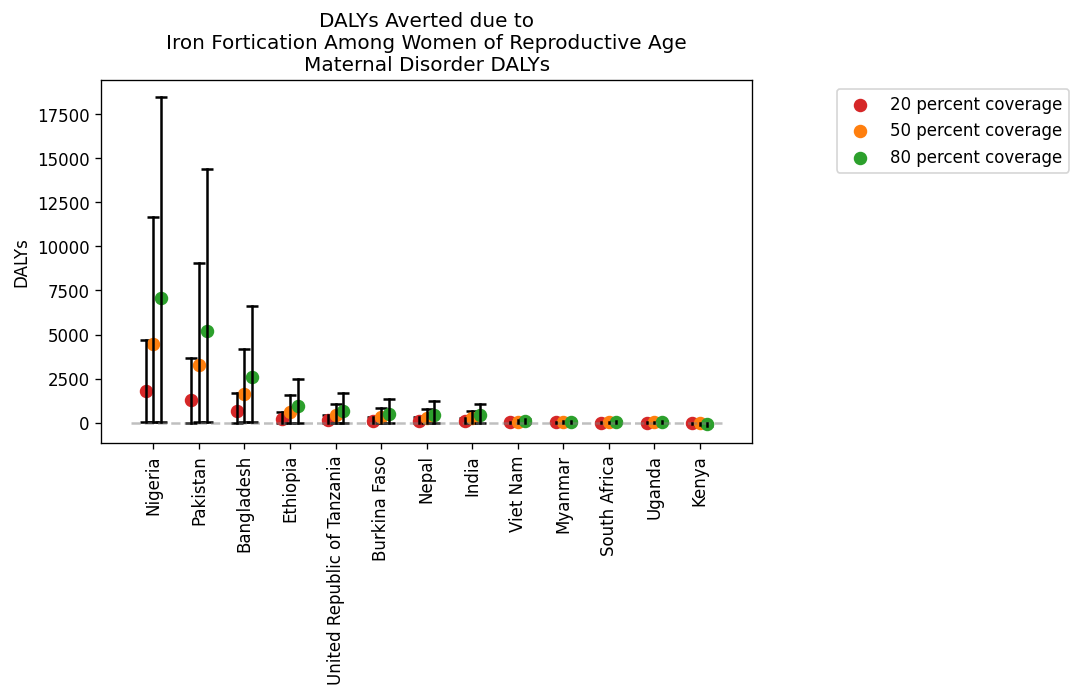

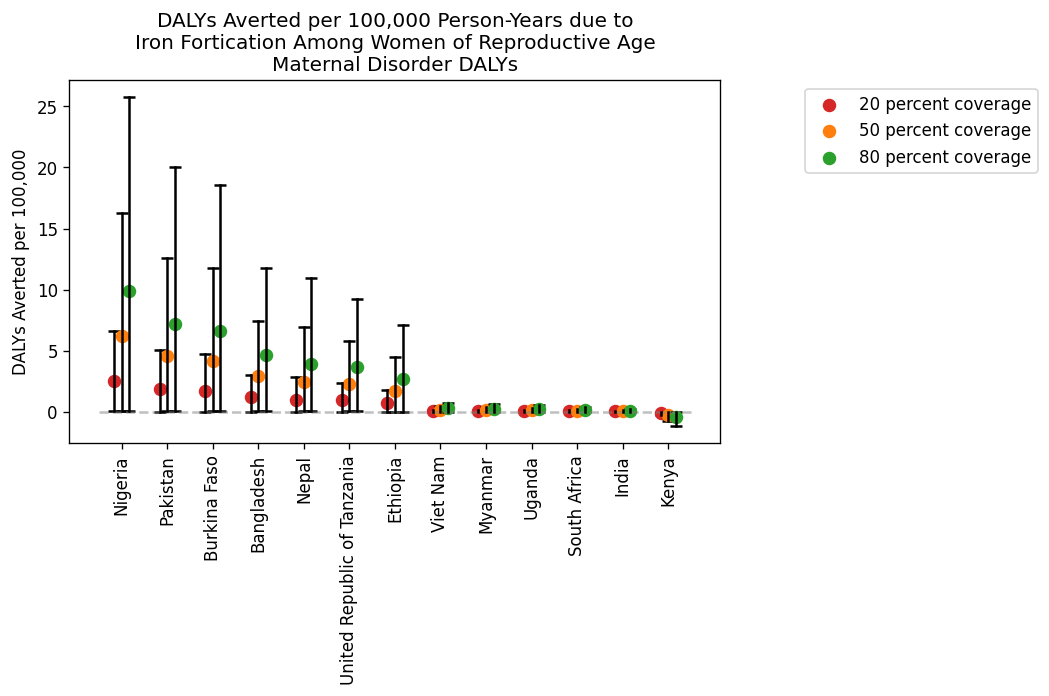

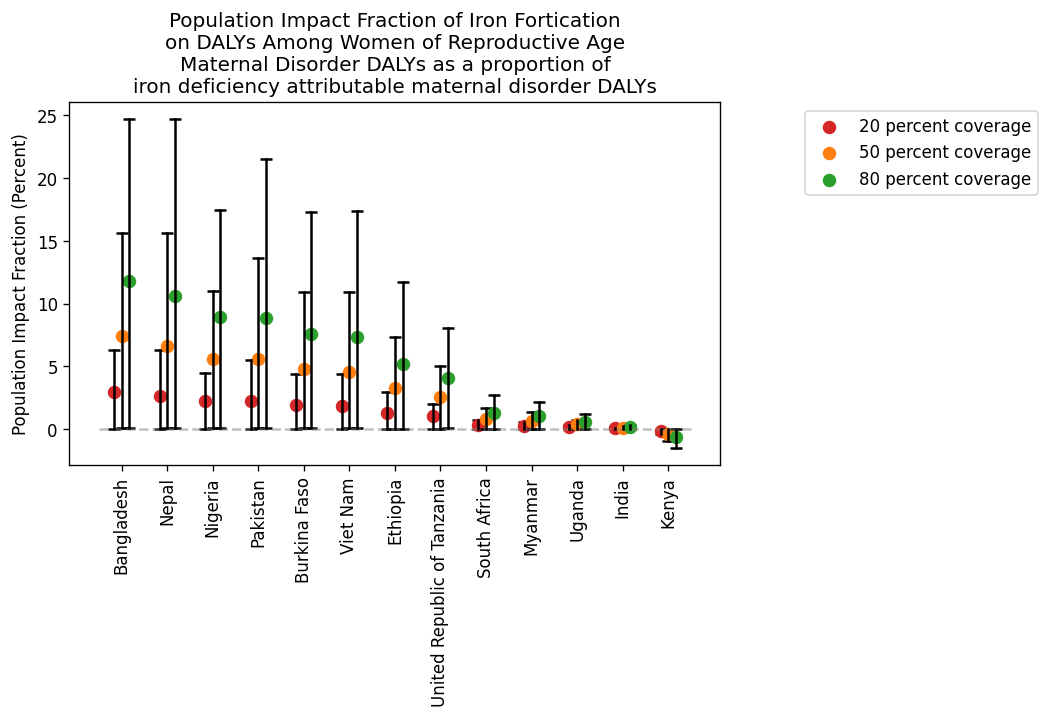

In [35]:
make_dot_plots(
    maternal_counts_averted,
    'Iron', 
    'counts', 
    coverage_levels, 'Maternal Disorder DALYs', 
    'iron_wra_maternal_disorder_counts_averted', True)
make_dot_plots(
    maternal_rates_averted,
    'Iron', 
    'rates',
    coverage_levels, 'Maternal Disorder DALYs', 
    'iron_wra_maternal_disorder_rates_averted', True)
make_dot_plots(
    maternal_disorders_pif,
    'Iron', 
    'pifs',
    coverage_levels, 'Maternal Disorder DALYs as a proportion of\niron deficiency attributable maternal disorder DALYs',
    'iron_wra_maternal_disorder_pif', True)

# OVERALL

In [36]:
overall_counts_averted = anemia_counts_averted + maternal_counts_averted
overall_rates_averted = anemia_rates_averted + maternal_rates_averted
overall_counts_averted.head()

draw                                 draw_0      draw_1     draw_10  \
location_id coverage_level year                                       
15          0.2            2021    0.000000    0.000000    0.000000   
                           2022  157.529109   86.829681   71.443384   
                           2023  629.644762  347.157666  285.657251   
                           2024  629.644762  347.157666  285.657251   
                           2025  629.644762  347.157666  285.657251   

draw                               draw_100    draw_101    draw_102  \
location_id coverage_level year                                       
15          0.2            2021    0.000000    0.000000    0.000000   
                           2022   56.839339  137.513417  143.897036   
                           2023  227.295951  549.665366  575.194542   
                           2024  227.295951  549.665366  575.194542   
                           2025  227.295951  549.665366  575.194542   

draw                              draw_103    draw_104    draw_105  \
location_id coverage_level year                                      
15          0.2            2021   0.000000    0.000000    0.000000   
                           2022  17.262612  132.035595   78.727053   
                           2023  69.043778  527.798377  314.778764   
                           2024  69.043778  527.798377  314.778764   
                           2025  69.043778  527.798377  314.778764   

draw                               draw_106  ...    draw_990    draw_991  \
location_id coverage_level year              ...                           
15          0.2            2021    0.000000  ...    0.000000    0.000000   
                           2022  175.040965  ...   77.849445   43.756703   
                           2023  699.464298  ...  311.269330  174.987965   
                           2024  699.464298  ...  311.269330  174.987965   
                           2025  699.464298  ...  311.269330  174.987965   

draw                               draw_992    draw_993    draw_994  \
location_id coverage_level year                                       
15          0.2            2021    0.000000    0.000000    0.000000   
                           2022   55.375743  202.632026   56.805377   
                           2023  221.443019  809.591153  227.153489   
                           2024  221.443019  809.591153  227.153489   
                           2025  221.443019  809.591153  227.153489   

draw                               draw_995    draw_996    draw_997  \
location_id coverage_level year                                       
15          0.2            2021    0.000000    0.000000    0.000000   
                           2022  109.672897  126.031426   78.960124   
                           2023  438.451678  503.804686  315.698643   
                           2024  438.451678  503.804686  315.698643   
                           2025  438.451678  503.804686  315.698643   

draw                               draw_998    draw_999  
location_id coverage_level year                          
15          0.2            2021    0.000000    0.000000  
                           2022   72.441431   80.969473  
                           2023  289.654454  323.759855  
                           2024  289.654454  323.759855  
                           2025  289.654454  323.759855  

[5 rows x 1000 columns]

In [37]:
overall_pif = overall_rates_averted / ((ira_ylds + iron_attributable_maternal_disorder_burden)) * 100
overall_pif.head()

draw                               draw_0    draw_1   draw_10  draw_100  \
location_id coverage_level year                                           
15          0.2            2021  0.000000  0.000000  0.000000  0.000000   
                           2022  0.071110  0.044587  0.047077  0.026562   
                           2023  0.284227  0.178265  0.188231  0.106221   
                           2024  0.284227  0.178265  0.188231  0.106221   
                           2025  0.284227  0.178265  0.188231  0.106221   

draw                             draw_101  draw_102  draw_103  draw_104  \
location_id coverage_level year                                           
15          0.2            2021  0.000000  0.000000  0.000000  0.000000   
                           2022  0.085103  0.073058  0.008846  0.081639   
                           2023  0.340171  0.292032  0.035381  0.326344   
                           2024  0.340171  0.292032  0.035381  0.326344   
                           2025  0.340171  0.292032  0.035381  0.326344   

draw                             draw_105  draw_106  ...  draw_990  draw_991  \
location_id coverage_level year                      ...                       
15          0.2            2021  0.000000  0.000000  ...  0.000000  0.000000   
                           2022  0.037173  0.131436  ...  0.047587  0.022233   
                           2023  0.148631  0.525220  ...  0.190268  0.088913   
                           2024  0.148631  0.525220  ...  0.190268  0.088913   
                           2025  0.148631  0.525220  ...  0.190268  0.088913   

draw                             draw_992  draw_993  draw_994  draw_995  \
location_id coverage_level year                                           
15          0.2            2021  0.000000  0.000000  0.000000  0.000000   
                           2022  0.028234  0.124465  0.032610  0.053609   
                           2023  0.112906  0.497286  0.130399  0.214319   
                           2024  0.112906  0.497286  0.130399  0.214319   
                           2025  0.112906  0.497286  0.130399  0.214319   

draw                             draw_996  draw_997  draw_998  draw_999  
location_id coverage_level year                                          
15          0.2            2021  0.000000  0.000000  0.000000  0.000000  
                           2022  0.129579  0.057065  0.049516  0.047104  
                           2023  0.517987  0.228159  0.197988  0.188347  
                           2024  0.517987  0.228159  0.197988  0.188347  
                           2025  0.517987  0.228159  0.197988  0.188347  

[5 rows x 1000 columns]

In [38]:
overall_pif['measure'] = 'pif'
overall_counts_averted['measure'] = 'counts_averted'
overall_rates_averted['measure'] = 'rates_averted'
iron_wra_results = pd.concat([overall_pif.reset_index(),
                         overall_counts_averted.reset_index(),
                         overall_rates_averted.reset_index()],
                        ignore_index=True)
iron_wra_results.to_pickle('results_raw/iron_wra.pkl')

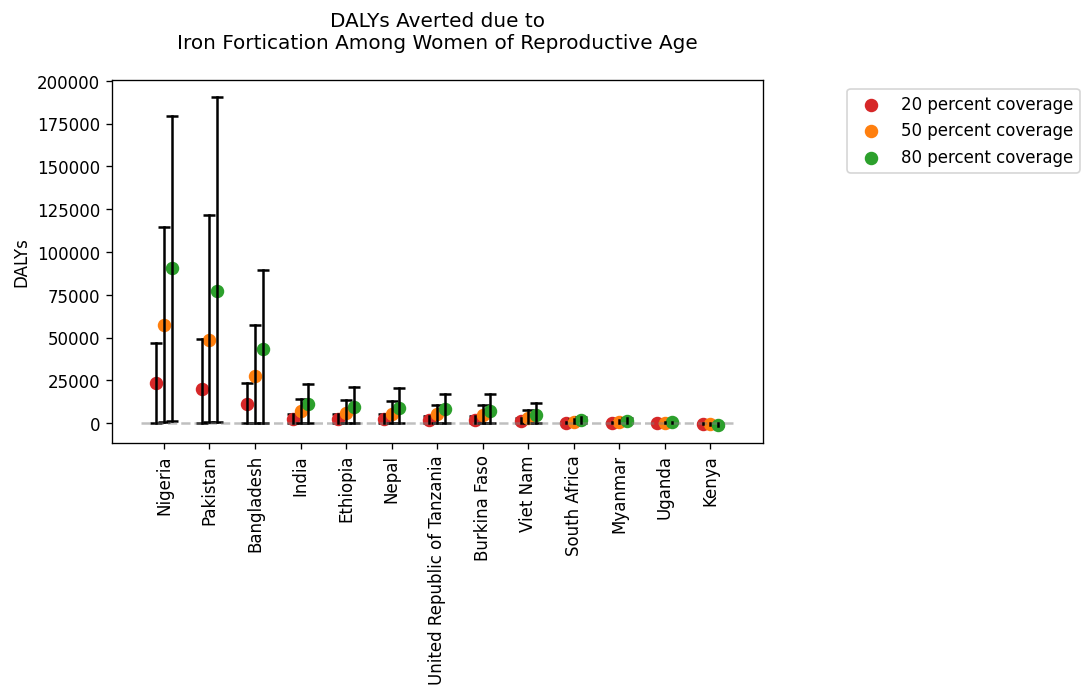

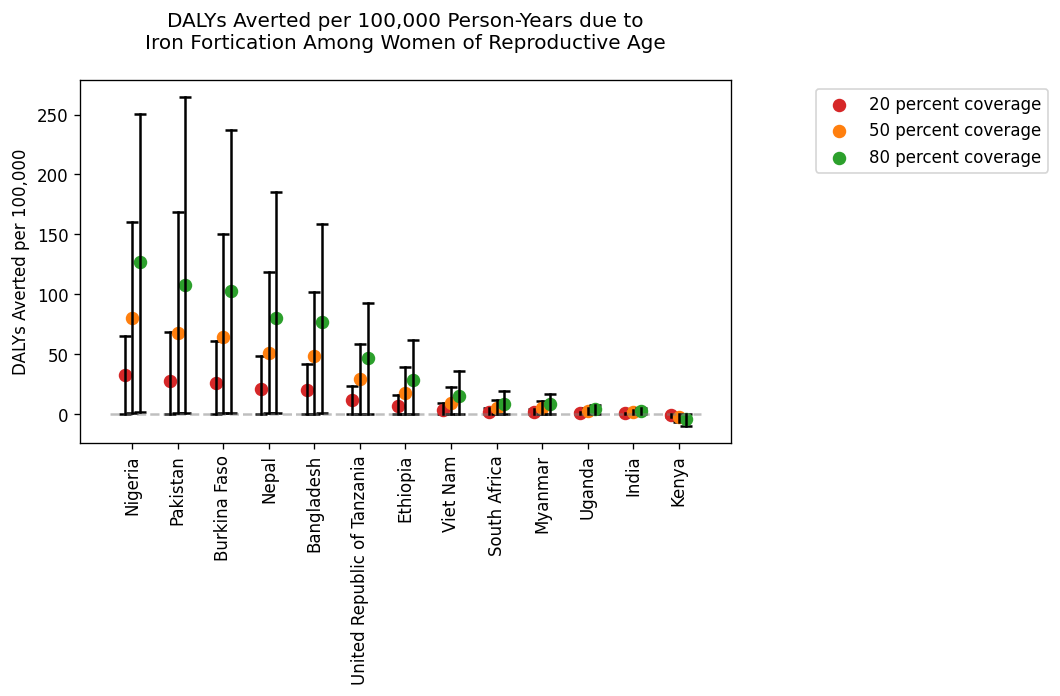

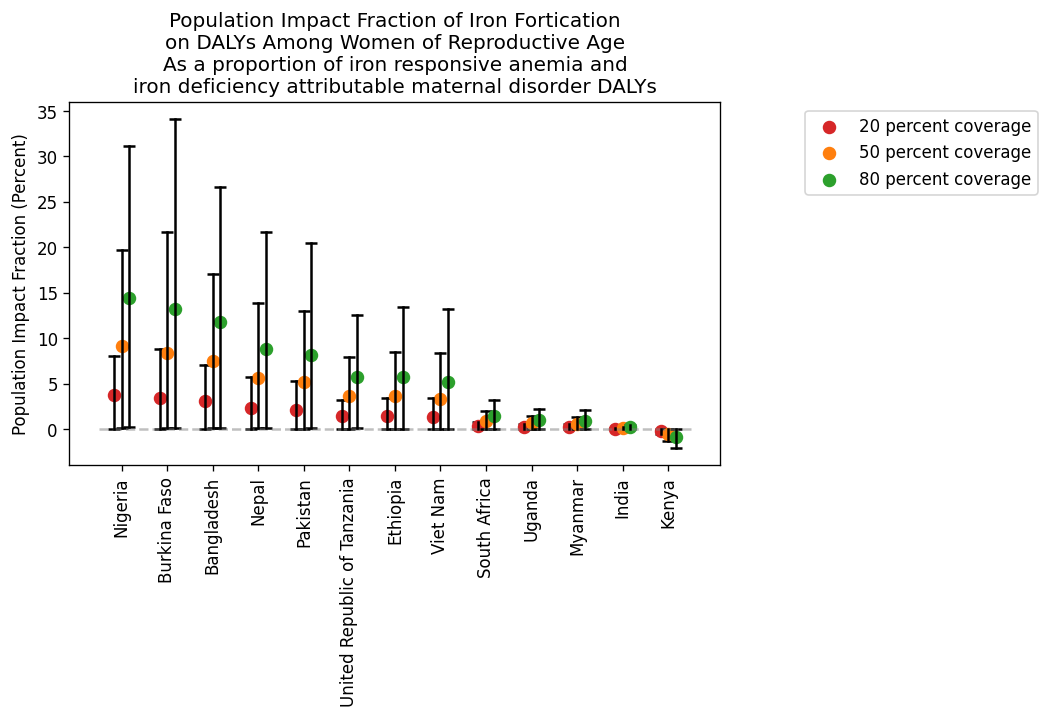

In [39]:
make_dot_plots(
    overall_counts_averted,
    'Iron', 
    'counts', 
    coverage_levels, 
    '', 
    'iron_wra_overall_counts_averted',
    True)
make_dot_plots(
    overall_rates_averted,
    'Iron', 
    'rates',
    coverage_levels, 
    '', 
    'iron_wra_overall_rates_averted',
    True)
make_dot_plots(
    overall_pif,
    'Iron', 
    'pifs',
    coverage_levels, 
    'As a proportion of iron responsive anemia and\niron deficiency attributable maternal disorder DALYs', 
    'iron_wra_overall_pif',
    True)